In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
folder = "XXXXXX/"
file='XXXXXX.csv'


In [ ]:
df=pd.read_csv(folder+file)

In [5]:
#check types
df.dtypes
#get the date right
df.publication_date = pd.to_datetime(df['publication_date'])

df['just_date1'] = df['publication_date'].dt.date
df['just_year1']= df['publication_date'].dt.year

#check length
len(df)

#check the number of modelled topics
num_topics=len(df['topic'].unique())

In [ ]:
#filter by date (to ensure time-frames)
dfmodern=df.loc[df.publication_date > "XX/XX/XX"]
len(dfmodern)

In [ ]:
#check the days of the time-frame
dates=dfmodern['just_date'].unique().tolist()
len(dates)

#For the first visualisation (articles count on topics, by country)

In [11]:
#groupby
df2=pd.DataFrame({'count' : dfmodern.groupby( ["country_iso3","topic"] ).size()}).reset_index()
#pivot
df2 = df2.pivot(index='country_iso3', columns='topic', values='count')

Plot stacked bars

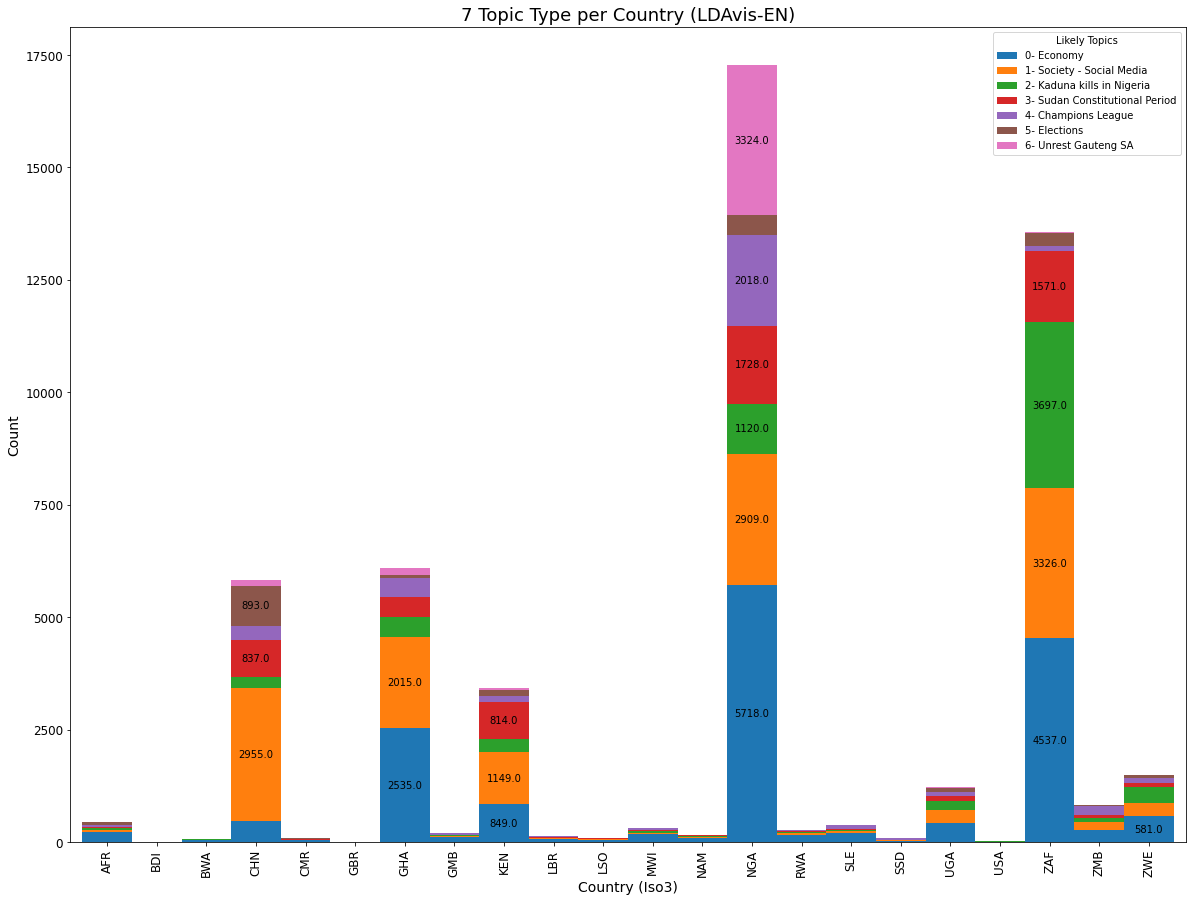

In [13]:
ax=df2.plot( kind='bar', figsize=(20,15), width = 1, linewidth=2, stacked=True, fontsize=12)
ax.legend(mode='wide',loc='best', bbox_to_anchor=(1, 1), title="Likely Topics", 
          labels=(
          "0- Economy",
          "1- Society - Social Media",
          "2- Kaduna kills in Nigeria",
          "3- Sudan Constitutional Period",
          "4- Champions League",
          "5- Elections",
          "6- Unrest Gauteng SA",
          "7- Covid News"))

ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Country (Iso3)", fontsize=14)
ax.set_title(str(num_topics)+" Topic Type per Country (LDAvis-EN)",fontsize=18)
for c in ax.containers:
    labels=[v.get_height() if v.get_height() > 500 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10 )
#plt.savefig(folder+str(num_topics)+'NewLDAvidTopicscountpercountry.png')

#4D visualisation
following: https://github.com/ostwalprasad/PythonMultiDimensionalPlots

In [21]:
import plotly
import plotly.graph_objs as go


In [14]:
#dataframe from count by day
df3=pd.DataFrame({'count' : dfmodern.groupby( ["just_date1","country_iso3","topic"] ).size()}).reset_index()

In [15]:
#change name
data = df3
data

,just_date1,country_iso3,topic,count
0,2021-05-01,BDI,0,1
1,2021-05-01,BWA,0,2
2,2021-05-01,CHN,0,16
3,2021-05-01,CHN,1,56
4,2021-05-01,CHN,2,2
...,...,...,...,...
4198,2021-07-01,ZAF,0,1
4199,2021-07-01,ZAF,1,1
4200,2021-07-01,ZAF,2,2
4201,2021-07-01,ZWE,1,1


In [51]:
#Set marker properties
markercolor = data['topic']

In [ ]:
#Make Plotly figure
#as html opens directly on browser. 

fig1 = go.Scatter3d(x=data['topic'],
                    y=data['just_date1'],
                    z=data['country_iso3'],
                    marker=dict(color=markercolor,
                                opacity=0.5,
                                #reversescale=FALSE,
                                #colorscale='Blues',
                                size=4),
                    line=dict (width=0.02),
                    #mode='marker'
                    )

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="date"),
                                yaxis=dict( title="topic"),
                                zaxis=dict(title="country")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("4DPlot.html"))

# Daily Topic progression 
(one stacked bar diagram per day)

Following https://holypython.com/how-to-create-matplotlib-animations-the-ultimate-guide/


In [17]:
dataf=data

In [18]:
dates=data.just_date1.astype(str).unique()
dates=dates.tolist()

In [19]:
dataf['just_date1']=pd.to_datetime(data['just_date1'], format='%Y-%m-%d')
dataf['topic'] =dataf['topic'].astype(str)
#isinstance(data, pd.DataFrame)
dataf
#.dtypes

,just_date1,country_iso3,topic,count
0,2021-05-01,BDI,0,1
1,2021-05-01,BWA,0,2
2,2021-05-01,CHN,0,16
3,2021-05-01,CHN,1,56
4,2021-05-01,CHN,2,2
...,...,...,...,...
4198,2021-07-01,ZAF,0,1
4199,2021-07-01,ZAF,1,1
4200,2021-07-01,ZAF,2,2
4201,2021-07-01,ZWE,1,1


In [ ]:
dates

In [ ]:

        for d in dates:
                data2=dataf.loc[dataf.just_date1 == d]
                datart=data2.drop(['just_date1'], axis=1)
                datart['topic'] =datart['topic'].astype(str)
                
                i = datart.pivot(index='country_iso3', columns='topic', values='count')

                ax=i.plot(kind='bar',
                        figsize=(20,15), 
                        width = 0.3, linewidth=2, stacked=True, fontsize=10)
                ax.legend(mode='wide',loc='upper left', bbox_to_anchor=(1, 1), title="Likely Topics", 
                        labels=(
                        "0- Economy",
                        "1- Society - Social Media",
                        "2- Kaduna kills in Nigeria",
                        "3- Sudan Constitutional Period",
                        "4- Champions League",
                        "5- Elections",
                        "6- Unrest Gauteng SA",
                        "7- Covid News"))

                ax.set_ylabel("Count", fontsize=12)
                ax.set_xlabel("Country (Iso3)", fontsize=12)
                ax.set_title(str(num_topics)+" Topic Type per Country (LDAvis-EN) "+ str(d),fontsize=16)
                for c in ax.containers:
                        labels=[v.get_height() if v.get_height() > 30 else '' for v in c]
                        ax.bar_label(c, labels=labels, label_type='center', fontsize=10 )
                plt.savefig(folder+"dailyprogression/"+str(num_topics)+'NewLDAvidTopicscountpercountry '+str(d)+'.png')